In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Load the training CSV
df = pd.read_csv('training_data.csv')

# Define features: using numeric features and missingness indicators
features = [
    'AskingPrice', 'Revenue', 'CashFlow_Calc', 'Margin_Calc', 'Multiple_Calc',
    'AskingPrice_missing', 'Revenue_missing', 'CashFlow_Calc_missing', 'Margin_Calc_missing', 'Multiple_Calc_missing'
]

X = df[features]
y = df['Target']

# Split the data (stratified by target)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Build a pipeline that imputes missing values and scales the data
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=-999)),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, features)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

print("Scikit-learn Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))


Scikit-learn Logistic Regression
Accuracy: 0.9243542435424354
AUC: 0.8797190144217977
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       989
           1       0.63      0.33      0.43        95

    accuracy                           0.92      1084
   macro avg       0.79      0.65      0.70      1084
weighted avg       0.91      0.92      0.91      1084



Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7624 - loss: 0.5178 - val_accuracy: 0.8865 - val_loss: 0.4973
Epoch 2/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.3868 - val_accuracy: 0.8884 - val_loss: 0.4407
Epoch 3/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8688 - loss: 0.3551 - val_accuracy: 0.8496 - val_loss: 0.4281
Epoch 4/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8718 - loss: 0.3224 - val_accuracy: 0.8948 - val_loss: 0.3557
Epoch 5/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8720 - loss: 0.3423 - val_accuracy: 0.8764 - val_loss: 0.3624
Epoch 6/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8936 - loss: 0.2975 - val_accuracy: 0.8921 - val_loss: 0.3739
Epoch 7/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8809 - loss: 0.3184 - val_accuracy: 0.8828 - val_loss: 0.4107
Epoch 8/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8789 - loss: 0.3156 - val_accuracy: 0.8838

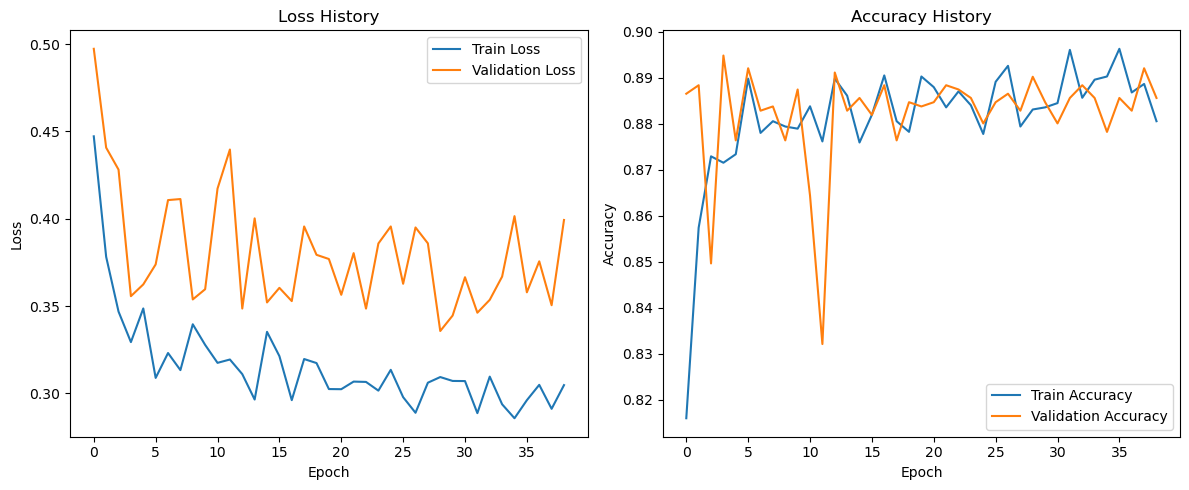

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test Accuracy: 0.8902214022140221
Test AUC: 0.901931775850141
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94       989
           1       0.43      0.80      0.56        95

    accuracy                           0.89      1084
   macro avg       0.71      0.85      0.75      1084
weighted avg       0.93      0.89      0.90      1084



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# --- Data Loading and Preprocessing ---

# Load the training CSV (make sure 'training_data.csv' is in your working directory)
df = pd.read_csv('training_data.csv')

# Define the features to use: numeric features and missingness indicators
features = [
    'AskingPrice', 'Revenue', 'CashFlow_Calc', 'Margin_Calc', 'Multiple_Calc',
    'AskingPrice_missing', 'Revenue_missing', 'CashFlow_Calc_missing', 'Margin_Calc_missing', 'Multiple_Calc_missing'
]

# Use these features and the target
X = df[features].copy()
y = df['Target'].values

# Split the data into training and testing sets (stratify to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Since TensorFlow models require no NaNs, impute missing values with a constant (e.g. -999)
imputer = SimpleImputer(strategy='constant', fill_value=-999)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardize the features so that each feature has mean 0 and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Balanced Data Generator ---
# We create a generator that yields balanced batches (equal number of positive and negative samples)
def balanced_data_generator(X, y, batch_size):
    # Get indices for each class
    pos_idx = np.where(y == 1)[0]
    neg_idx = np.where(y == 0)[0]
    half_batch = batch_size // 2
    
    while True:
        pos_samples = np.random.choice(pos_idx, half_batch, replace=True)
        neg_samples = np.random.choice(neg_idx, half_batch, replace=True)
        indices = np.concatenate([pos_samples, neg_samples])
        np.random.shuffle(indices)
        yield X[indices], y[indices]

batch_size = 32
train_generator = balanced_data_generator(X_train, y_train, batch_size)
steps_per_epoch = len(y_train) // batch_size  # define steps per epoch

# --- Build and Train the Neural Network ---
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model using the balanced generator
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)

# --- Visualize the Training History ---
plt.figure(figsize=(12, 5))

# Plot Loss History
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy History
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# --- Evaluate the Model on the Test Set ---
y_pred_proba = model.predict(X_test).ravel()
y_pred = (y_pred_proba >= 0.5).astype(int)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test AUC:", roc_auc_score(y_test, y_pred_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))


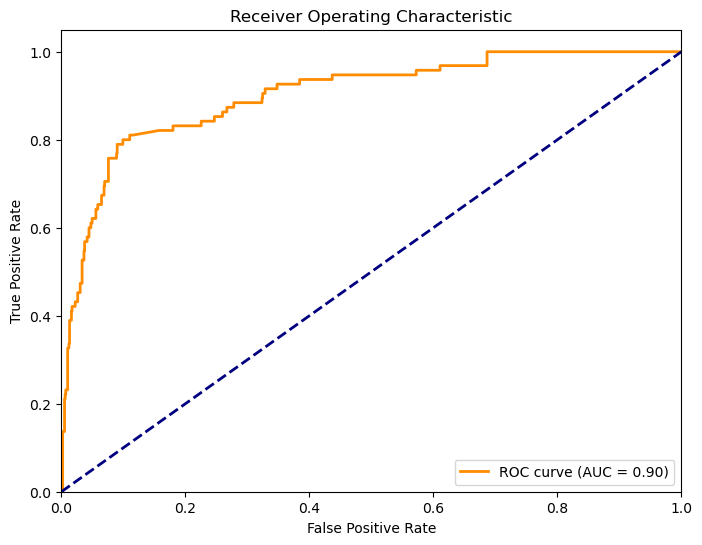

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute the ROC curve and AUC for the test set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7607 - loss: 0.5178
Epoch 1: val_loss improved from inf to 0.58401, saving model to best_model.h5


135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7646 - loss: 0.5120 - val_accuracy: 0.8487 - val_loss: 0.5840
Epoch 2/100
117/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8662 - loss: 0.3588
Epoch 2: val_loss improved from 0.58401 to 0.39089, saving model to best_model.h5


135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8661 - loss: 0.3569 - val_accuracy: 0.8570 - val_loss: 0.3909
Epoch 3/100
116/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8752 - loss: 0.3323
Epoch 3: val_loss improved from 0.39089 to 0.38930, saving model to best_model.h5


135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8751 - loss: 0.3317 - val_accuracy: 0.8865 - val_loss: 0.3893
Epoch 4/100
116/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8896 - loss: 0.2938
Epoch 4: val_loss did not improve from 0.38930
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8894 - loss: 0.2950 - val_accuracy: 0.8782 - val_loss: 0.4001
Epoch 5/100
118/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8944 - loss: 0.3001
Epoch 5: val_loss did not improve from 0.38930
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8928 - loss: 0.3018 - val_accuracy: 0.8911 - val_loss: 0.4118
Epoch 6/100
119/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8814 - loss: 0.3105
Epoch 6: val_loss did not improve from 0.38930
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8812 - loss: 0.3114 - val_accuracy: 0.8801 - val_loss: 0.3924
Epoch 7/100
120/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8842 - loss: 0.3039
Epoch 7: val_loss did not improve from 0.38

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8830 - loss: 0.3092 - val_accuracy: 0.8939 - val_loss: 0.3718
Epoch 9/100
116/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8694 - loss: 0.3434
Epoch 9: val_loss did not improve from 0.37178
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8707 - loss: 0.3402 - val_accuracy: 0.8911 - val_loss: 0.3745
Epoch 10/100
118/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8929 - loss: 0.2886
Epoch 10: val_loss improved from 0.37178 to 0.35326, saving model to best_model.h5


135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8929 - loss: 0.2879 - val_accuracy: 0.8875 - val_loss: 0.3533
Epoch 11/100
116/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8818 - loss: 0.3106
Epoch 11: val_loss did not improve from 0.35326
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8822 - loss: 0.3098 - val_accuracy: 0.8838 - val_loss: 0.3776
Epoch 12/100
117/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8898 - loss: 0.2904
Epoch 12: val_loss did not improve from 0.35326
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8896 - loss: 0.2921 - val_accuracy: 0.8875 - val_loss: 0.3744
Epoch 13/100
117/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8728 - loss: 0.3205
Epoch 13: val_loss did not improve from 0.35326
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8735 - loss: 0.3193 - val_accuracy: 0.8506 - val_loss: 0.3695
Epoch 14/100
117/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8814 - loss: 0.3044
Epoch 14: val_loss did not improve f

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9014 - loss: 0.2797 - val_accuracy: 0.8967 - val_loss: 0.3276
Epoch 17/100
115/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8946 - loss: 0.2893
Epoch 17: val_loss did not improve from 0.32760
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8941 - loss: 0.2897 - val_accuracy: 0.8958 - val_loss: 0.3537
Epoch 18/100
120/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8920 - loss: 0.2875
Epoch 18: val_loss did not improve from 0.32760
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8916 - loss: 0.2883 - val_accuracy: 0.8792 - val_loss: 0.3765
Epoch 19/100
117/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8916 - loss: 0.3057
Epoch 19: val_loss did not improve from 0.32760
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8910 - loss: 0.3050 - val_accuracy: 0.8893 - val_loss: 0.3548
Epoch 20/100
121/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8864 - loss: 0.3040
Epoch 20: val_loss did not improve f

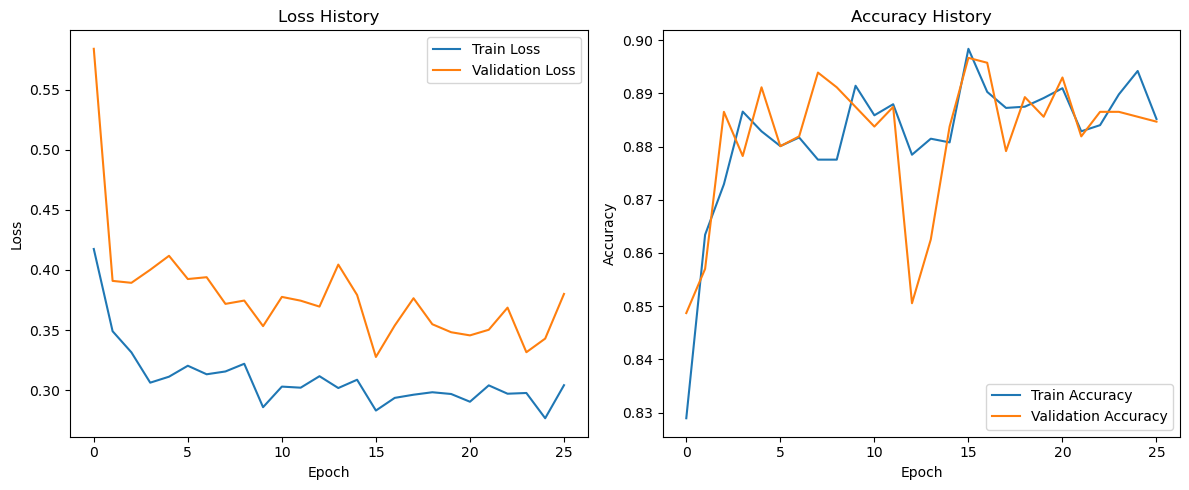

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


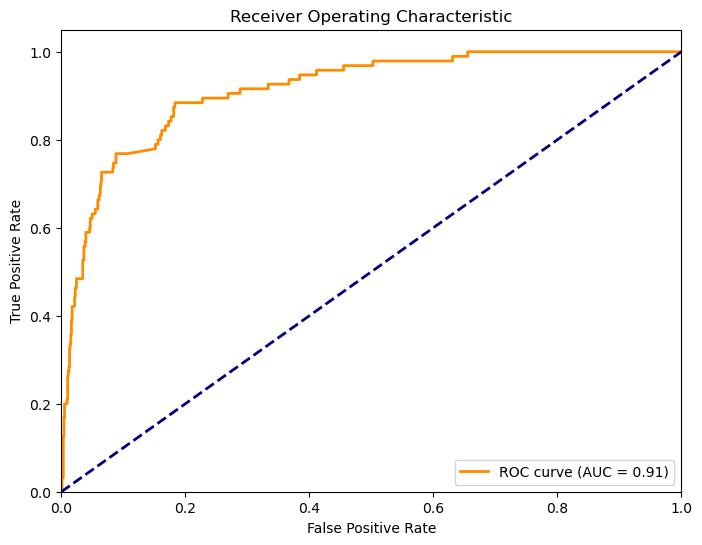

Test Accuracy: 0.8966789667896679
Test AUC: 0.9129689745090735
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94       989
           1       0.45      0.77      0.57        95

    accuracy                           0.90      1084
   macro avg       0.71      0.84      0.75      1084
weighted avg       0.93      0.90      0.91      1084



In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score, roc_auc_score

# --- Data Loading and Preprocessing ---
df = pd.read_csv('training_data.csv')

# Define features: use our numeric features and missingness indicators
features = [
    'AskingPrice', 'Revenue', 'CashFlow_Calc', 'Margin_Calc', 'Multiple_Calc',
    'AskingPrice_missing', 'Revenue_missing', 'CashFlow_Calc_missing', 'Margin_Calc_missing', 'Multiple_Calc_missing'
]

X = df[features].copy()
y = df['Target'].values

# Split data into training and testing sets (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Impute missing values with a constant (-999) because our models can't accept NaNs directly
imputer = SimpleImputer(strategy='constant', fill_value=-999)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Create a Balanced Data Generator ---
def balanced_data_generator(X, y, batch_size):
    pos_idx = np.where(y == 1)[0]
    neg_idx = np.where(y == 0)[0]
    half_batch = batch_size // 2
    while True:
        pos_samples = np.random.choice(pos_idx, half_batch, replace=True)
        neg_samples = np.random.choice(neg_idx, half_batch, replace=True)
        indices = np.concatenate([pos_samples, neg_samples])
        np.random.shuffle(indices)
        yield X[indices], y[indices]

batch_size = 32
train_generator = balanced_data_generator(X_train, y_train, batch_size)
steps_per_epoch = len(y_train) // batch_size

# --- Improved Neural Network Model ---
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Optional: Save the best model based on validation loss
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

# --- Visualize the Training History ---
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# --- Visualize the ROC Curve ---
y_pred_proba = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# --- Evaluate the Model ---
y_pred = (y_pred_proba >= 0.5).astype(int)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test AUC:", roc_auc_score(y_test, y_pred_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))
